# Below are the libraries we will need to use.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import csv

# Next we will import the training and testing datasets.

In [2]:
training_set = pd.read_csv(r, encoding= 'unicode_escape')
testing_set = pd.read_csv(r,encoding= 'unicode_escape')

# Then we can take a look at a subsection of each dataset.

In [3]:
training_set.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists,like
0,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.429,0.6670,144.997,480707,4,A Little Piece of Heaven,Avenged Sevenfold,['Avenged Sevenfold'],1
1,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.209,0.0857,125.921,204733,4,Helena,My Chemical Romance,['My Chemical Romance'],1
2,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.231,0.4060,110.020,352427,4,Afterlife,Avenged Sevenfold,['Avenged Sevenfold'],1
3,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.012200,0.115,0.2110,137.114,366213,4,Knights of Cydonia,Muse,['Muse'],1
4,0.412,0.920,9,-4.852,0,0.0575,0.000456,0.002600,0.110,0.4550,93.162,227440,4,Hysteria,Muse,['Muse'],1


In [4]:
testing_set.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4,Memories,Maroon 5,['Maroon 5']
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4,Intentions (feat. Quavo),Justin Bieber,"['Justin Bieber', 'Quavo']"
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3,Stuck with U (with Justin Bieber),Ariana Grande,"['Ariana Grande', 'Justin Bieber']"
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4,Make You Mine,PUBLIC,['PUBLIC']


# To better understand what we are looking at, we can make some visualizations.

<AxesSubplot:>

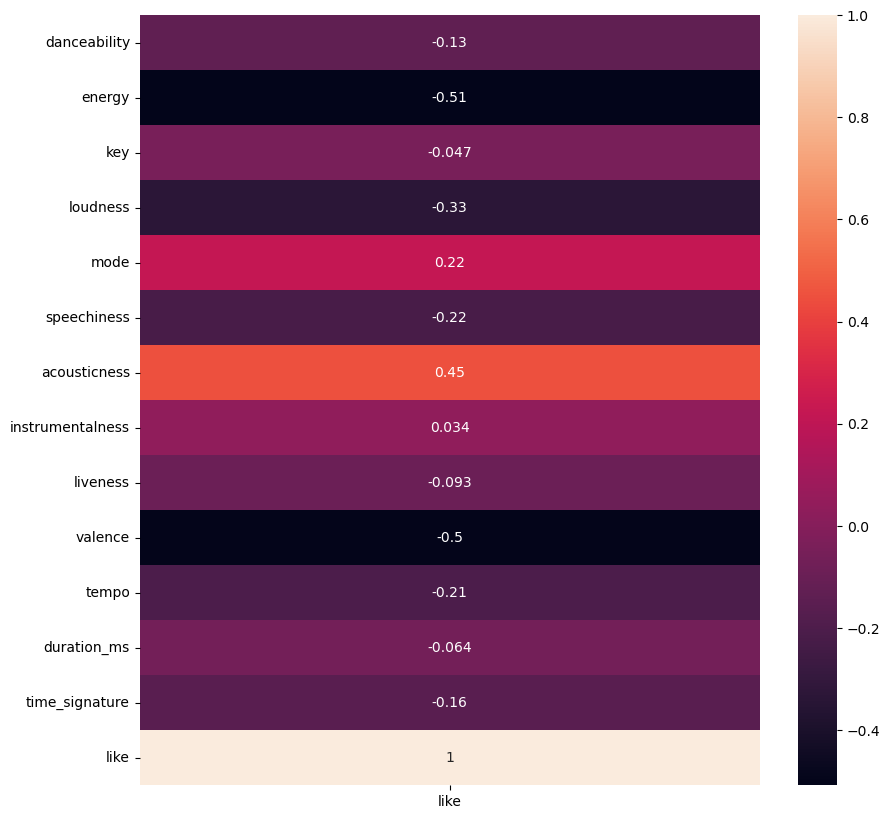

In [5]:
corr = training_set.corr()[["like"]]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, ax=ax)

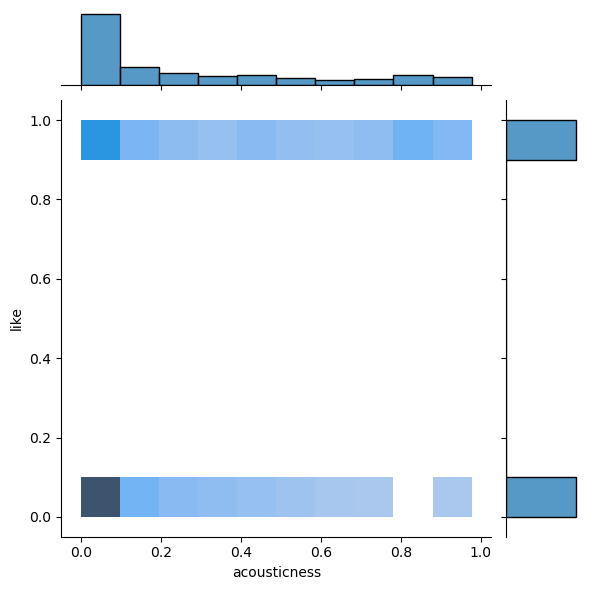

In [6]:
sns.jointplot(x=training_set['acousticness'], y=training_set['like'], kind='hist')

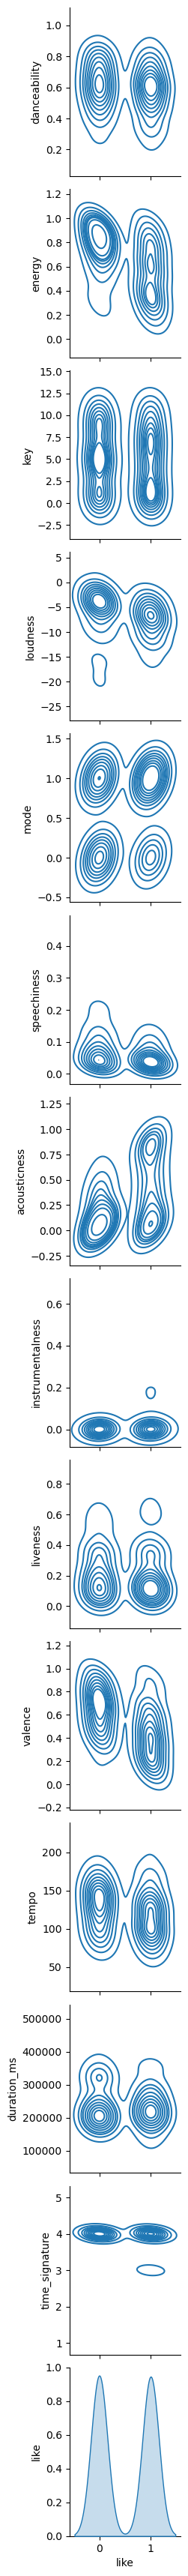

In [7]:
sns.pairplot(training_set, x_vars='like', kind='kde')

# Looking at more information about the dataset.

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      301 non-null    float64
 1   energy            301 non-null    float64
 2   key               301 non-null    int64  
 3   loudness          301 non-null    float64
 4   mode              301 non-null    int64  
 5   speechiness       301 non-null    float64
 6   acousticness      301 non-null    float64
 7   instrumentalness  301 non-null    float64
 8   liveness          301 non-null    float64
 9   valence           301 non-null    float64
 10  tempo             301 non-null    float64
 11  duration_ms       301 non-null    int64  
 12  time_signature    301 non-null    int64  
 13  title             301 non-null    object 
 14  first_artists     301 non-null    object 
 15  all_artists       301 non-null    object 
 16  like              301 non-null    int64  
dt

In [9]:
training_set.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
title               0
first_artists       0
all_artists         0
like                0
dtype: int64

In [10]:
training_set.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,like
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.602498,0.667638,5.112957,-6.208934,0.627907,0.060671,0.269207,0.013389,0.198589,0.533621,122.992947,232315.368771,3.950166,0.498339
std,0.136801,0.226051,3.528059,3.660738,0.484168,0.046913,0.297120,0.071383,0.143063,0.227754,28.842240,54039.286005,0.272351,0.500830
min,0.188000,0.109000,0.000000,-23.606000,0.000000,0.023200,0.000034,0.000000,0.020200,0.042800,51.533000,95467.000000,1.000000,0.000000
25%,0.517000,0.489000,2.000000,-7.725000,0.000000,0.032200,0.030800,0.000000,0.099500,0.367000,100.873000,198280.000000,4.000000,0.000000
50%,0.606000,0.736000,5.000000,-5.458000,1.000000,0.044000,0.132000,0.000000,0.147000,0.536000,124.960000,219389.000000,4.000000,0.000000
75%,0.695000,0.862000,8.000000,-3.815000,1.000000,0.072500,0.434000,0.000088,0.268000,0.709000,143.875000,248867.000000,4.000000,1.000000
max,0.956000,0.980000,11.000000,1.844000,1.000000,0.442000,0.977000,0.639000,0.793000,0.971000,205.272000,480707.000000,5.000000,1.000000


# Next we will build and train our model.

In [11]:
X_train = training_set.drop(['like','title','first_artists','all_artists'], axis=1).values
target_label = training_set['like'].values
X_test = testing_set.drop(['title','first_artists','all_artists'], axis=1).values

In [12]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=10)

In [13]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
training_prediction = model.predict(X_vld)

In [14]:
print(mean_absolute_error(y_vld, training_prediction))

0.17582417582417584


# With a mean absolute error of about 0.2, we are working within our acceptable range of 70% accuracy.

# Below we will fit the model with the test data set. We will then create a sepearate csv file to write the results of the predictions to.

In [15]:
prediction_set = pd.read_csv(r, encoding= 'unicode_escape')

In [16]:
prediction = model.predict(X_test)
prediction_set['like'] = prediction

In [17]:
prediction_set.to_csv(r, index=False)

# Now we can take a look at our prediction data.

In [18]:
prediction_set.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists,like
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",1
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4,Memories,Maroon 5,['Maroon 5'],1
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4,Intentions (feat. Quavo),Justin Bieber,"['Justin Bieber', 'Quavo']",1
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3,Stuck with U (with Justin Bieber),Ariana Grande,"['Ariana Grande', 'Justin Bieber']",1
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4,Make You Mine,PUBLIC,['PUBLIC'],0


# Below is a simple user interface to search predictions based on song title and artist.

In [19]:
song_index = 

In [20]:
song_artist = prediction_set.loc[song_index][14]
song_title = prediction_set.loc[song_index][13]
like_value = prediction_set.loc[song_index][16]

In [21]:
print("The song: ")
print(song_title)
print("By: ")
print(song_artist)
print("has a prediction value of:")
print(like_value)
print("If the value is zero, the song is predicted to not be liked.")
print("If it is 1, the song is predicted to be liked.")

The song: 
Leave The Door Open
By: 
Bruno Mars
has a prediction value of:
1
If the value is zero, the song is predicted to not be liked.
If it is 1, the song is predicted to be liked.
